In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import simplejson

In [5]:
routesData = pd.read_csv("routes.csv", names = ["airline_code","airline_ID", "src_port_code", "src_port_id",
                                  "dest_port_code","dest_port_id", "code_share", "stops", "equipment"])
routesData.head()

,airline_code,airline_ID,src_port_code,src_port_id,dest_port_code,dest_port_id,code_share,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
routesData.shape

(67663, 9)

In [7]:
route_cnt = routesData['src_port_code'].value_counts()

Text(0.5, 0, 'Source airport code')

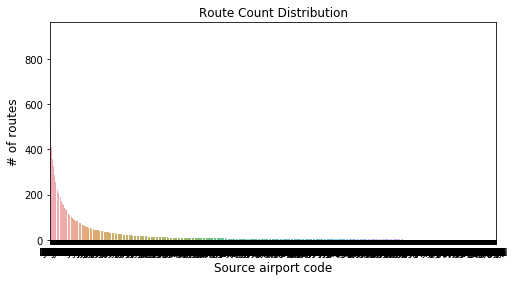

In [9]:
plt.figure(figsize=(8,4))
ax= sns.barplot(route_cnt.index, route_cnt.values, alpha=0.8)
plt.title("Route Count Distribution")
plt.ylabel('# of routes', fontsize=12)
plt.xlabel('Source airport code', fontsize=12)

In [10]:
route_cnt

ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
FRA    497
LAX    492
DFW    469
JFK    456
AMS    453
PVG    411
SIN    408
BCN    391
ICN    370
MUC    368
MIA    368
DEN    361
IST    358
DXB    356
LGW    356
HKG    355
CAN    338
FCO    331
MAD    330
BKK    326
DME    324
CTU    324
YYZ    319
MAN    316
BRU    316
      ... 
GRP      1
KME      1
GMZ      1
TTJ      1
UTT      1
CGM      1
BCI      1
YES      1
NAJ      1
PLN      1
ADK      1
FVM      1
AFZ      1
NTQ      1
OAL      1
EAT      1
KKE      1
ACZ      1
MTS      1
TEE      1
RDD      1
YZR      1
FUT      1
QFN      1
ATD      1
KBC      1
LKG      1
PDT      1
WSN      1
AFL      1
Name: src_port_code, Length: 3409, dtype: int64

In [10]:
toproutes = routesData.groupby(by='src_port_code', as_index=False, level=None, sort=True)['stops'].count()
toproutes = toproutes.rename(columns={'stops':'count'})
toproutes = toproutes.sort_values(by='count', ascending=False)[:250]
toproutes = toproutes.reset_index(drop=True)
toproutes.head()

,src_port_code,count
0,ATL,915
1,ORD,558
2,PEK,535
3,LHR,527
4,CDG,524


In [14]:
toproutesi = 250
routes = []
for i, val in enumerate(list(toproutes['src_port_code'])):
    routes.append({"label":val,
                     "id":i})
f = open('toproutes.json', 'w')
simplejson.dump(routes, f)
f.close()

In [12]:
int(route_cnt.index[1])

24